In [39]:
### input: table of all vs all ECF comparison
### output: basic statistics
### output: combinations of ECF_clusters on proteins from different functional classes (GO-level-3)

In [40]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

work_dir            = '/Users/kszczepaniak/Data/Phage/preliminary-results/ecf-compare/'
annot_filepath      = '/Users/kszczepaniak/Data/Phage/Bogna/annotation.data.for.rafal.new.cov.0.8.txt'
ecf_aho_80_filepath = '/Users/kszczepaniak/Data/Phage/preliminary-results/table-ecf-aho-80'

sns.set(rc={"figure.figsize":(10, 8)})

In [41]:
output_dirpath   = work_dir + 'output/prot-families/all-by-all/'
hhr_table        = pd.read_csv(output_dirpath + 'table-ecf-hhr.txt', sep=',')
# add qcov
hhr_table = hhr_table.assign(qcov = lambda x: (x.qend - x.qstart + 1) / x.qlength)
# create prob x qcov metrics
hhr_table = hhr_table.assign(probxqcov = lambda x: x.prob * x.qcov * 0.01)
hhr_table

,qname,qstart,qend,qlength,sname,sstart,send,slength,pident,bitscore,eval,prob,pval,qcov,probxqcov
0,ecf_reprseq00025_0,1,277,277,ecf_reprseq00025_0,1,277,277,45,958.0,6.000000e-146,100.0,2.000000e-149,1.000000,1.000000
1,ecf_reprseq00025_0,2,188,277,ecf_reprseq00025_1,5,142,138,69,67.9,9.800000e-07,96.7,3.300000e-10,0.675090,0.652812
2,ecf_reprseq00025_0,157,189,277,ecf_reprseq14277_0,65,95,31,23,51.6,2.400000e-04,94.5,8.000000e-08,0.119134,0.112581
3,ecf_reprseq00025_1,1,156,156,ecf_reprseq00025_1,1,156,156,70,420.2,2.500000e-69,100.0,8.400000e-73,1.000000,1.000000
4,ecf_reprseq00025_1,37,155,156,ecf_reprseq24083_2,3,116,114,6,187.2,1.300000e-29,99.9,4.500000e-33,0.762821,0.762058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103877,ecf_reprseq34445_1,11,34,74,ecf_reprseq16773_0,16,39,24,4,49.6,1.700000e-04,94.7,5.600000e-08,0.324324,0.307135
1103878,ecf_reprseq34445_1,3,62,74,ecf_reprseq17440_0,51,128,78,0,41.8,7.200000e-04,93.4,2.500000e-07,0.810811,0.757297
1103879,ecf_reprseq34447_0,1,71,71,ecf_reprseq34447_0,1,71,71,89,189.3,8.300000e-37,100.0,2.800000e-40,1.000000,1.000000
1103880,ecf_reprseq34447_0,1,71,71,ecf_reprseq19584_0,5,75,71,24,174.5,2.800000e-33,99.9,9.700000e-37,1.000000,0.999000


In [42]:
# filter data - select and apply filtering criteria
# hhr_table[hhr_table.pval < 1e-03]
# hhr_table = hhr_table[hhr_table.prob >= 95.0]
# hhr_table = hhr_table[hhr_table.qcov >= 0.5]
# eliminate self-hits
hhr_table = hhr_table[hhr_table['sname'] != hhr_table['qname']]
hhr_table

,qname,qstart,qend,qlength,sname,sstart,send,slength,pident,bitscore,eval,prob,pval,qcov,probxqcov
1,ecf_reprseq00025_0,2,188,277,ecf_reprseq00025_1,5,142,138,69,67.9,9.800000e-07,96.7,3.300000e-10,0.675090,0.652812
2,ecf_reprseq00025_0,157,189,277,ecf_reprseq14277_0,65,95,31,23,51.6,2.400000e-04,94.5,8.000000e-08,0.119134,0.112581
4,ecf_reprseq00025_1,37,155,156,ecf_reprseq24083_2,3,116,114,6,187.2,1.300000e-29,99.9,4.500000e-33,0.762821,0.762058
5,ecf_reprseq00025_1,37,155,156,ecf_reprseq10300_0,1,117,117,12,172.3,7.500000e-27,99.8,2.600000e-30,0.762821,0.761295
6,ecf_reprseq00025_1,38,155,156,ecf_reprseq24083_3,2,95,94,11,151.1,1.600000e-23,99.7,5.400000e-27,0.756410,0.754141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103875,ecf_reprseq34445_1,3,59,74,ecf_reprseq23952_0,4,71,68,9,51.9,2.500000e-05,95.7,8.400000e-09,0.770270,0.737149
1103876,ecf_reprseq34445_1,41,63,74,ecf_reprseq08386_0,250,277,28,4,57.5,2.500000e-05,95.7,8.400000e-09,0.310811,0.297446
1103877,ecf_reprseq34445_1,11,34,74,ecf_reprseq16773_0,16,39,24,4,49.6,1.700000e-04,94.7,5.600000e-08,0.324324,0.307135
1103878,ecf_reprseq34445_1,3,62,74,ecf_reprseq17440_0,51,128,78,0,41.8,7.200000e-04,93.4,2.500000e-07,0.810811,0.757297


96.03633626022366


<AxesSubplot:xlabel='prob', ylabel='Count'>

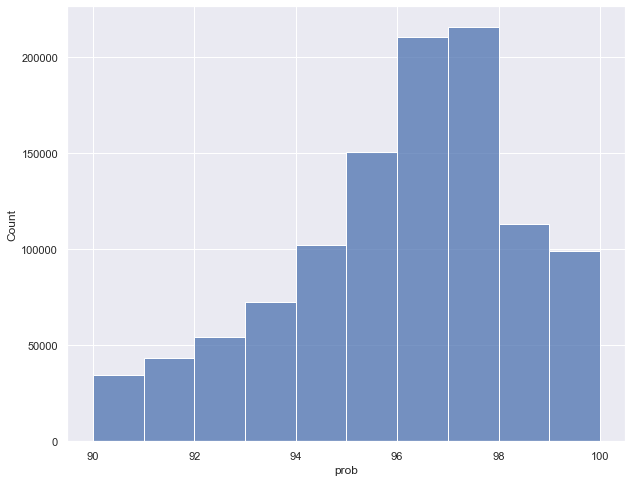

In [43]:
print(hhr_table['prob'].mean())
sns.histplot(hhr_table['prob'], binwidth=1)

Mean qcov: 0.5331940816262123


<AxesSubplot:xlabel='qcov', ylabel='Count'>

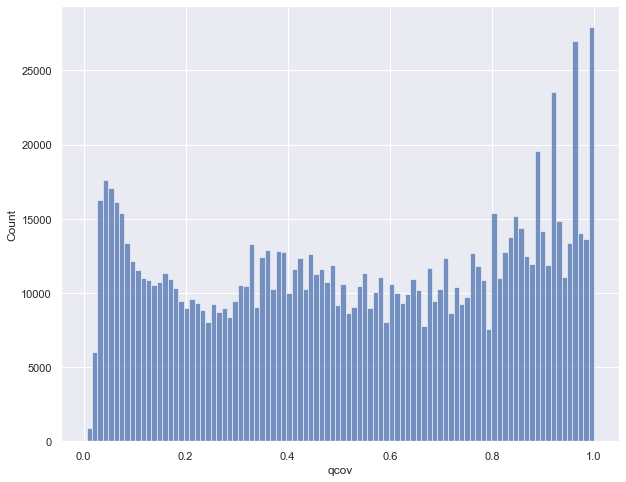

In [7]:
print('Mean qcov:', hhr_table['qcov'].mean())
sns.histplot(hhr_table['qcov'])

Mean probxqcov: 0.5150100148647565


<AxesSubplot:xlabel='probxqcov', ylabel='Count'>

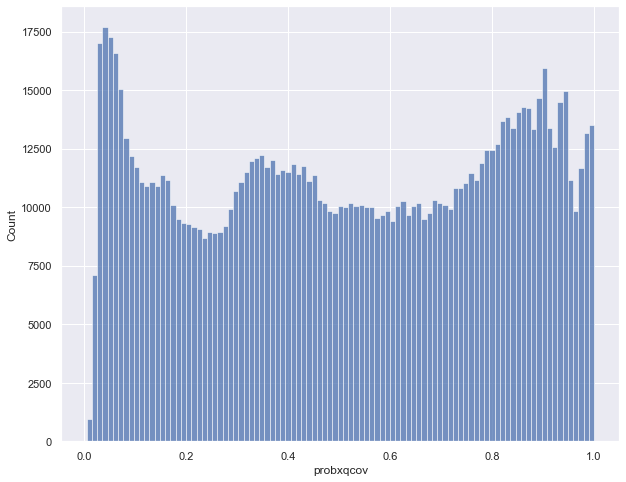

In [29]:
print('Mean probxqcov:', hhr_table['probxqcov'].mean())
sns.histplot(hhr_table['probxqcov'])

132.85056174960636


<AxesSubplot:xlabel='qlength', ylabel='Count'>

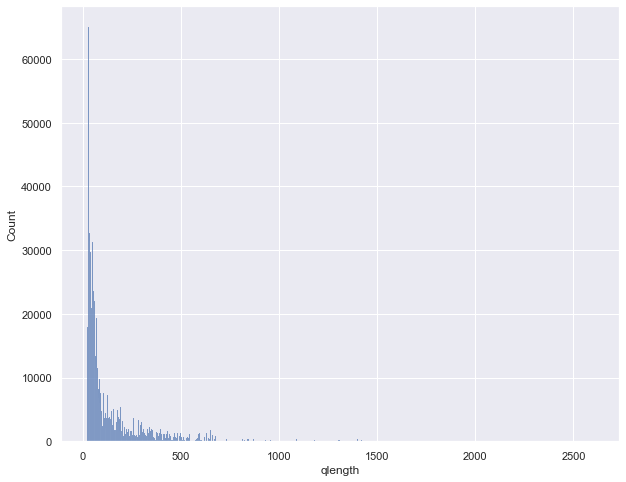

In [8]:
print(hhr_table['qlength'].mean())
sns.histplot(hhr_table['qlength'])

In [13]:
### analyse combinations of ECF_clusters on proteins from different functional classes (GO-level-3)

# load annots
annot = pd.read_csv(annot_filepath, sep='\t')

# load MCL cluster data: create table ecf, ecf_cluster
ecf_clusters = {}
fmcl = open(output_dirpath + 'dump.data.mci.I14', 'r')
for cid, clust in enumerate(fmcl):
    ecf_clusters[cid] = clust.strip().split('\t')
fmcl.close()

# create reversed dict of ecf belonging to cluster
ecf2ecf_clust = {}
for cid, clust in ecf_clusters.items():
    for ecf in clust:
        ecf2ecf_clust[ecf] = cid

# load ECF table (with desired AHO cutoff)
table_ecf_80 = pd.read_pickle(ecf_aho_80_filepath + '.pickle')
table_ecf_80

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...
5,reprseq00178,0,13,0.861788,588,0.911303,0.399457,qname qstart qend qlength ...
6,reprseq00178,1,7,0.932685,155,0.875576,0.105299,qname qstart qend qlength ...
7,reprseq00178,2,27,0.857170,291,0.741377,0.197690,qname qstart qend qlength ...
...,...,...,...,...,...,...,...,...
9191,reprseq34436,4,12,0.913263,28,0.872024,0.354430,qname qstart qend qlength ...
9192,reprseq34445,0,33,0.874346,78,0.861305,0.478528,qname qstart qend qlength ...
9193,reprseq34445,1,9,0.974533,62,0.953405,0.380368,qname qstart qend qlength ...
9194,reprseq34447,0,5,0.841576,63,0.869841,0.473684,qname qstart qend qlength ...


In [16]:
# DEBUG
table_ecf_80[table_ecf_80['prot_id'] == 'reprseq20966']

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
5976,reprseq20966,0,5,1.0,25,0.96,0.3125,qname qstart qend qlength ...


In [18]:
# DEBUG
ecf2ecf_clust['ecf_reprseq20966_0'] # 10690

351

In [19]:
# for each reprseq: get all ECFs; enumerate combinations of ECF-clusters for reprseq
reprseq2ecf_clusts_comb = {}
ecfs_discarded_earlier  = [] # list of ecfs that were eliminated earlier in analysis (all vs all ECF step)
for sid, seq in table_ecf_80.groupby('prot_id'):
    prot_id      = seq['prot_id'].to_list()[0]
    ecf_clusters = []
    
    for eid, ecf in seq.iterrows():
        ecf_full_id  = 'ecf_' + prot_id + '_' + str(ecf.ecf_id)
        if ecf_full_id in ecf2ecf_clust.keys():
            ecf_clusters.append(ecf2ecf_clust[ecf_full_id])
        else:
            ecfs_discarded_earlier.append(ecf_full_id)
            
    if ecf_clusters:
        reprseq2ecf_clusts_comb[prot_id] = ecf_clusters
    
    
print(len(ecfs_discarded_earlier), 'eliminated in earlier steps')

4 eliminated in earlier steps


In [193]:
# DEBUG
ecfs_discarded_earlier.count('ecf_reprseq20966_0')

0

In [21]:
# eliminate redundancy (count only unique clusters and sort lists)
reprseq2ecf_clusts_comb_nr = {}
for k, v in reprseq2ecf_clusts_comb.items():
    reprseq2ecf_clusts_comb_nr[k] = sorted(list(set(v)))

# create table: reprseq, CC-annot, list of ECF clusters
# filter: unique combinations of annot and ECF clusters combination
fc_combinations_df = pd.DataFrame(columns = ['prot_id', 'annot', 'ecf_clusters'])
    
# add functional data (CC-level-3) to reprseq
for rseq, ecf_clust in reprseq2ecf_clusts_comb_nr.items():
    temp_data = [rseq, annot[annot['qname'] == rseq]['CC.level.3'].to_list()[0], ','.join([str(c) for c in ecf_clust])]
    temp_df = pd.DataFrame([temp_data], columns = ['prot_id', 'annot', 'ecf_clusters'])
    fc_combinations_df = fc_combinations_df.append(temp_df, ignore_index=True)

fc_combinations_df.to_csv(output_dirpath + 'plot-data-funct_class-ecf_cluster.txt')
fc_combinations_df

,prot_id,annot,ecf_clusters
0,reprseq00025,NaN,18
1,reprseq00027,NaN,1
2,reprseq00031,NaN,0
3,reprseq00035,NaN,1
4,reprseq00039,NaN,7
...,...,...,...
4071,reprseq34415,NaN,86
4072,reprseq34435,NaN,"1,12"
4073,reprseq34436,NaN,1
4074,reprseq34445,NaN,18


In [22]:
# clean data: drop nan and duplicated cluster combinations
fc_combinations_df_clear = fc_combinations_df.dropna()
fc_combinations_df_clear = fc_combinations_df_clear.drop_duplicates(subset=['annot', 'ecf_clusters'])
fc_combinations_df_clear

,prot_id,annot,ecf_clusters
65,reprseq00590,"virus tail, fiber",8
80,reprseq00662,viral nucleocapsid,30
108,reprseq00897,"virus tail, fiber",29
137,reprseq01215,"virus tail, sheath",56
195,reprseq01776,"viral capsid, unknown",111
257,reprseq02347,"virus tail, baseplate",48
270,reprseq02413,"viral capsid, unknown",83
386,reprseq03330,"viral capsid, unknown",113
388,reprseq03339,"virus tail, fiber","29,202"
464,reprseq03784,"virus tail, baseplate",42


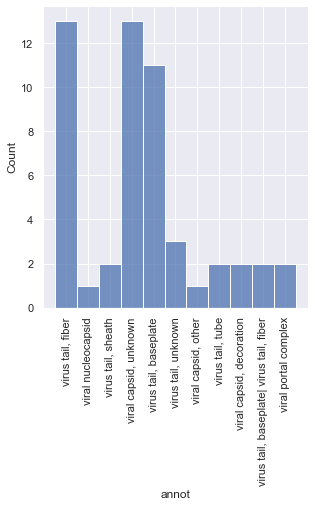

In [23]:
# plot: hist, number of ECF-clust combinations by functional class (CC-3)
sns.displot(fc_combinations_df_clear, x="annot").set_xticklabels(rotation=90)

In [29]:
### prepare statistics of average nb of ECFs per protein by functional class
# currently shows stats for proteins with any detcted ECF (non-ECF proteins excluded)

# process annots
annot_ecfs = annot.iloc[0:0]

for eid, ecf in table_ecf_80.iterrows(): # go by table_ecf_80, this way annot rows for multi-ECF prots will be included
    a = annot[annot.qname == ecf.prot_id].copy()
    annot_ecfs = annot_ecfs.append(a, ignore_index=True)
annot_ecfs

,qname,seq.length,BP.level.1,BP.level.2,BP.level.3,BP.level.4,BP.level.5,CC.level.1,CC.level.2,CC.level.3,MF.level.1,MF.level.2,phrog.class,phrog.annot
0,reprseq00051,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,reprseq00051,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,reprseq00178,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tail,tail protein
3,reprseq00178,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tail,tail protein
4,reprseq00178,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tail,tail protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6793,reprseq34436,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,integration and excision,cox-like excisionase and repressor
6794,reprseq34445,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other| unknown,mazg-like pyrophosphatase| unknown function
6795,reprseq34445,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other| unknown,mazg-like pyrophosphatase| unknown function
6796,reprseq34447,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"moron, auxiliary metabolic gene and host takeover",hicb-like antitoxin| toxin-antitoxin system hi...


In [30]:
# add annot data to ECF table
table_ecf_80['annot'] = annot_ecfs['CC.level.3']
table_ecf_80

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data,annot
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...,NaN
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...,NaN
5,reprseq00178,0,13,0.861788,588,0.911303,0.399457,qname qstart qend qlength ...,NaN
6,reprseq00178,1,7,0.932685,155,0.875576,0.105299,qname qstart qend qlength ...,NaN
7,reprseq00178,2,27,0.857170,291,0.741377,0.197690,qname qstart qend qlength ...,NaN
...,...,...,...,...,...,...,...,...,...
9191,reprseq34436,4,12,0.913263,28,0.872024,0.354430,qname qstart qend qlength ...,NaN
9192,reprseq34445,0,33,0.874346,78,0.861305,0.478528,qname qstart qend qlength ...,NaN
9193,reprseq34445,1,9,0.974533,62,0.953405,0.380368,qname qstart qend qlength ...,NaN
9194,reprseq34447,0,5,0.841576,63,0.869841,0.473684,qname qstart qend qlength ...,NaN


In [84]:
fclass2ecf_per_prot = {}
min_prots           = 1 # minimal number of prots in class to display on plot

plot_data = table_ecf_80.dropna()
# plot_data = table_ecf_80.fillna('Unknown') # comment/uncomment to include proteins without annotation

for fcid, fcdata in plot_data.groupby('annot'):
    ecf_per_prot = []
    for pid, pdata in fcdata.groupby('prot_id'):
        ecf_per_prot.append(len(pdata))
    if len(ecf_per_prot) >= min_prots:
        fclass2ecf_per_prot[fcid + ' (' + str(len(ecf_per_prot)) + ')'] = np.mean(ecf_per_prot)
fclass2ecf_per_prot

{'viral capsid, decoration (1)': 2.0,
 'viral capsid, other (1)': 1.0,
 'viral capsid, unknown (41)': 1.1219512195121952,
 'viral nucleocapsid (3)': 1.0,
 'viral portal complex (2)': 1.0,
 'virus tail, baseplate (28)': 1.1428571428571428,
 'virus tail, baseplate| virus tail, fiber (2)': 1.0,
 'virus tail, fiber (48)': 1.125,
 'virus tail, sheath (16)': 1.0,
 'virus tail, tube (2)': 1.0,
 'virus tail, unknown (3)': 1.0}

<AxesSubplot:>

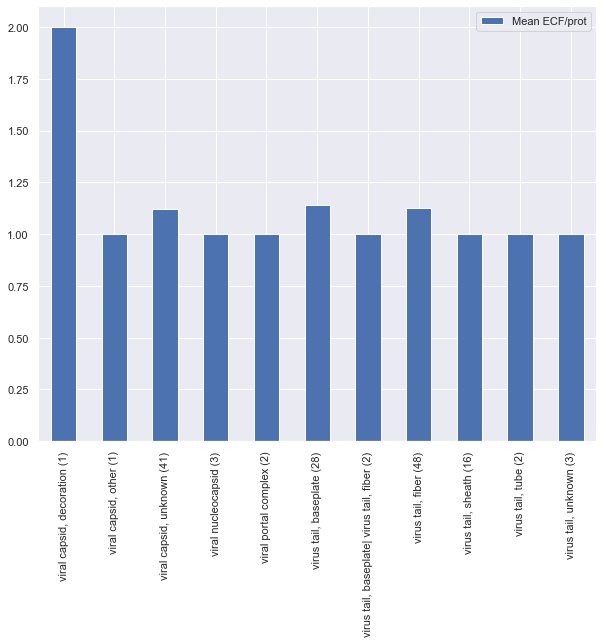

In [85]:
# create df and plot
df = pd.DataFrame.from_dict(fclass2ecf_per_prot, orient='index', columns=['Mean ECF/prot'])
df.plot(kind="bar")

,Mean ECF/prot
"viral capsid, decoration (14)",0.428571
"viral capsid, unknown (176)",0.312500
viral portal complex (50),0.060000
"virus tail, baseplate (149)",0.255034
"virus tail, fiber (96)",0.843750
"virus tail, sheath (36)",0.583333
"virus tail, tube (72)",0.041667
"virus tail, unknown (54)",0.055556


<AxesSubplot:>

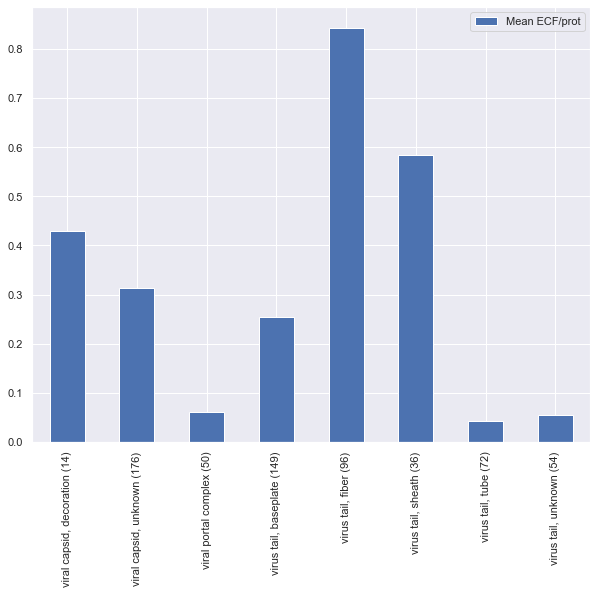

In [86]:
### prepare statistics of average nb of ECFs per protein by functional class
# version with ALL proteins (regardless of their ECF content)

fclass2ecf_per_prot = {}
min_prots           = 5 # minimal number of prots in class to display on plot
plot_data           = annot.copy()
# plot_data           = annot.fillna('Unknown') # comment/uncomment to include proteins without annotation

# iterate annot table (groupby CC3)
# for each reprseq: check if in table_ecf_80 and how many rows (=nb ECF)
for aid, cc3 in plot_data.groupby('CC.level.3'):
    ecf_per_prot = []
    for rseqid, rseq in cc3.iterrows():
        n_ecf = len(table_ecf_80[table_ecf_80['prot_id'] == rseq.qname])
        ecf_per_prot.append(n_ecf)
    if len(ecf_per_prot) >= min_prots:    
        fclass2ecf_per_prot[aid + ' (' + str(len(ecf_per_prot)) + ')'] = np.mean(ecf_per_prot)        
        
# create df and plot
df = pd.DataFrame.from_dict(fclass2ecf_per_prot, orient='index', columns=['Mean ECF/prot'])
# show data
display(df)
df.plot(kind="bar")